In [2]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()

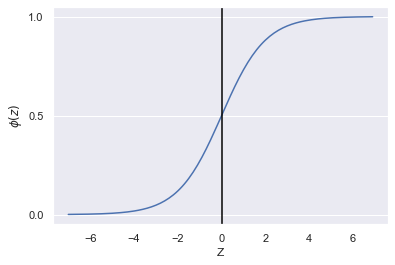

In [19]:
###Funcion sigmoid(z) 
import numpy as np

def sigmoid_fuc(x):
    return 1/(1+np.exp(-x))

z=np.arange(-7,7,0.1)
phi_z=sigmoid_fuc(z)
plt.plot(z,phi_z)
plt.axvline(0,color='black')
plt.yticks([0,0.5,1])
plt.xlabel('Z');plt.ylabel('$\phi(z)$')
ax=plt.gca()
ax.yaxis.grid(True) ###Establece grilla en el eje y
ax.xaxis.grid(False) ##quitar ticks del eje x



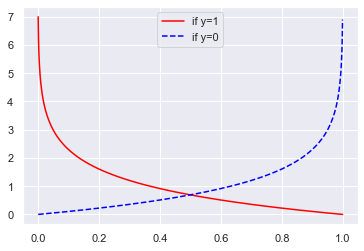

In [23]:
# import numpy as np
c1=-np.log(phi_z)
c0=-np.log(1-phi_z)
plt.plot(phi_z,c1,c='red',label='if y=1')
plt.plot(phi_z,c0,c='blue',label='if y=0',linestyle='--')
plt.legend()

In [78]:
from sklearn.datasets import load_iris;from sklearn.preprocessing import StandardScaler

y_train=load_iris().target[(load_iris().target==1) | (load_iris().target==0)]
y_train
x_train=load_iris().data[(load_iris().target==1) | (load_iris().target==0)]
x_train=x_train[:,[2,3]]
x_train_std=StandardScaler().fit_transform(x_train)


In [79]:
class LGGD():

    import numpy as np;
    def __init__(self,epoch,n_rate,random_state):
        self.epoch=epoch
        self.n_rate=n_rate
        self.random_state=random_state

    def fit(self,X,y):
        import numpy as np;
        rgen=  np.random.RandomState(self.random_state)
        self.pesos=rgen.normal(loc=0,scale=0.01,size=X.shape[1]+1)

        self.costo=[]

        for i in range(self.epoch):
            net=self.net_input(X)
            salida=self.activacion(net)
            errores=y-salida
            self.pesos[1:]+=self.n_rate*X.T.dot(errores)
            self.pesos[0]+=np.sum(errores)*self.n_rate
            costo = (-y.dot(np.log(salida)) -
                    ((1 - y).dot(np.log(1 - salida))));
            self.costo.append(costo)

        return self


    def activacion(self,z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def net_input(self,x):
        return np.dot(x,self.pesos[1:])+self.pesos[0]

    def predict(self,X):
        return np.where(self.net_input(X)>=0,1,0)


In [80]:
ppn=LGGD(1000,0.05,1)
ppn.fit(x_train_std,y_train)


In [81]:

def visualizar_fronteras(X,y,modelo,muestreo=0.02,test_set=None):
    from matplotlib.colors import ListedColormap
    marcadores=['^','v','o','^','v']
    colores=['red','yellow','black','yellow','gray']
    
    mapa_colores=ListedColormap(colores[:len(np.unique(y))])
    
    x_min_f1,x_max_f1=(X[:,0]).min()-1,(X[:,0]).max()+1  ##Característica Longitud_cépalo
    x_min_f2,x_max_f2=(X[:,1]).min()-1,(X[:,1]).max()+1###Característicaa longitud_pétalo
    
    vector1=np.arange(x_min_f1,x_max_f1,muestreo)
    vector2=np.arange(x_min_f2,x_max_f2,muestreo)
    
    x_meshgrid,y_meshgrid=np.meshgrid(vector1,vector2)
    
    Z=modelo.predict(np.array([x_meshgrid.ravel(),y_meshgrid.ravel()]).T)
    Z=Z.reshape(x_meshgrid.shape)
    plt.contourf(x_meshgrid,y_meshgrid,Z,alpha=0.2,cmap=mapa_colores)
    
    plt.xlim(x_min_f1,x_max_f1)
    plt.ylim(x_min_f2,x_max_f2)
    
    for i,index in enumerate(np.unique(y)):
        plt.scatter(x=X[y==index,0],y=X[y==index,1],marker=marcadores[i],alpha=0.8,edgecolor='black',label=index)
        plt.legend(loc='lower right')
    if test_set:
        x=X[test_set,:]
        plt.scatter(x[:,0],x[:,1],c='', edgecolor='black', alpha=1.0,linewidth=1, marker='o',
s=100, label='conjunto_testeo')

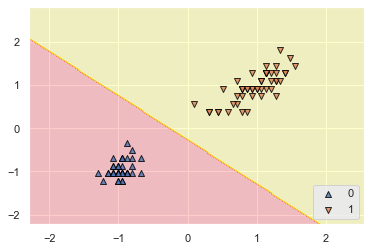

In [82]:
visualizar_fronteras(x_train_std,y_train,ppn)

In [86]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,random_state=1)
lr.fit(x_train_std,y_train)


array([[-1.01297765, -1.04211089]])